#### Enhanced sampling along $\phi$ and $\psi$ dihedrals of alanine dipeptide in vacuum and water using standard metadynamics with OpenMM and PySAGES
#### SD, Ferguson lab

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import mdtraj as md

import sys
sys.path.append("/home/sivadasetty/scratch-midway2/software/enhancements/SSAGES/PySAGES-openmm/PySAGES/examples/meta/")
import analysis as ana

In [2]:
folderdir = "/home/sivadasetty/scratch-midway2/software/enhancements/SSAGES/PySAGES-openmm/PySAGES/examples/meta/openmm/"

#### Read hills files and calculate free energies

In [20]:
exampledir1 = "w-5-0.1/"

hillsFile1 = folderdir + exampledir1 + "hills.dat"


hillsData1 = pd.read_csv(hillsFile1, delim_whitespace=True, comment="#", names=["time", "cv1", "cv2",
                                                                                "sigma1", "sigma2", "height"])
#hillsData1 = hillsData1.tail(500)
hillsDataArray = hillsData1.values
print(hillsData1.shape)
cv_values = hillsData1.values[:,[1,2]]
sigma = hillsData1.values[:,[3,4]]
height = hillsData1.values[:,5]

(5096, 6)


#### plot $\phi$ and $\psi$ at hill strides

([<matplotlib.axis.YTick at 0x7fea5cadd9a0>,
 [Text(0, -3.141592653589793, '-π'),
  Text(0, -1.5707963267948966, '-π/2'),
  Text(0, 0.0, '0'),
  Text(0, 1.5707963267948966, 'π/2'),
  Text(0, 3.141592653589793, 'π')])

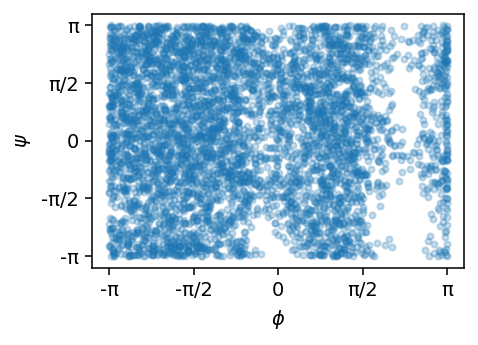

In [21]:
# plot dihedrals
plt.figure(figsize=(12,6), dpi=140);
plt.subplots_adjust(wspace=0.25, hspace=0.5)

plt.subplot(2, 3, 1)
plt.scatter(cv_values[:,0], cv_values[:,1], s=10, alpha=0.25);
plt.ylabel(r'$\psi$');
plt.xlabel(r'$\phi$');theta = np.arange(-math.pi , math.pi + 0.1, step=(math.pi/2))
plt.xticks(theta, ['-π', '-π/2', '0', 'π/2', 'π'])
plt.yticks(theta, ['-π', '-π/2', '0', 'π/2', 'π'])

#plt.savefig('Figures/butane-dihedrals-frame.png', bbox_inches = "tight")

#### calculate free energy using sum hills [prelim]

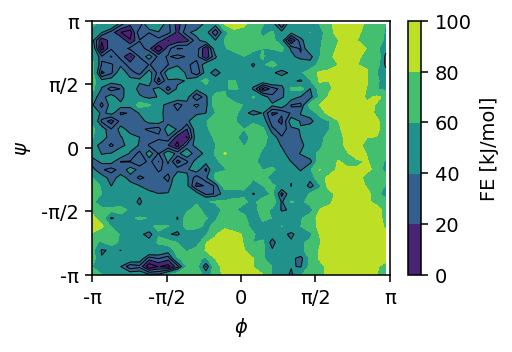

In [22]:
x1, x2 = np.mgrid[-math.pi:math.pi:0.2, -math.pi:math.pi:0.2]
x = np.vstack((x1.flatten(), x2.flatten())).T

fes1 = ana.sum_gaussians(x, cv_values, sigma, height, 2)

plt.figure(figsize=(12,6), dpi=140);
plt.subplots_adjust(wspace=0.25, hspace=0.5)

plt.subplot(2, 3, 1)

levels = np.array([10,20,30,40])

cpf = plt.contourf(x1, x2, -fes1.reshape(x1.shape[0], x1.shape[1]) +
             fes1.max(), len(levels), cmap='viridis') #vmin=0, vmax=40
cbar = plt.colorbar()
cbar.set_label('FE [kJ/mol]')

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
plt.contour(x1, x2, -fes1.reshape(x1.shape[0], x1.shape[1]) +
             fes1.max(), levels=levels, colors=line_colors, linewidths=0.5)


plt.ylabel(r'$\psi$');
plt.xlabel(r'$\phi$');
theta = np.arange(-math.pi , math.pi + 0.1, step=(math.pi/2))
plt.xticks(theta, ['-π', '-π/2', '0', 'π/2', 'π'])
plt.yticks(theta, ['-π', '-π/2', '0', 'π/2', 'π'])

plt.savefig('Figures/adp-pmf-standard-meta-w-5-s-01.png', bbox_inches = "tight")

#### check potential calculations 

In [ ]:
def exp_in_gaussian(delta_xi, sigma, h):
    
    sigma_square = 2 * np.multiply(sigma, sigma)
    delta_xi_square = np.multiply(delta_xi, delta_xi)
    arg = np.divide( delta_xi_square, sigma_square )
                    
    
    
    return h*np.product(np.exp(-arg), axis=0)
  
xi = np.array([-1.0858115, -0.92053854])
xi = np.array([-1.3289312,      -0.47459024])
xi = np.array([-1.1036174,      -0.92120636])
xi_stride = np.array([ [-1.16899025, -0.6347633 ], [-1.0858115,  -0.92053854], [-1.3289312,      -0.47459024] ])
delta_xi1 = xi - xi_stride[0]
delta_xi2 = xi - xi_stride[1]
delta_xi3 = xi - xi_stride[2]


delta_xi1_sq = delta_xi1*delta_xi1
delta_xi2_sq = delta_xi2*delta_xi2
delta_xi3_sq = delta_xi3*delta_xi3


sigma = np.array([0.1,0.1])
sigma_square = sigma*sigma


#print(xi_stride[0])
print(delta_xi1, delta_xi2)
print(delta_xi1_sq, delta_xi2_sq)
print(2*sigma_square)
print(np.divide( delta_xi1_sq, 2*sigma_square ))
print(np.divide( delta_xi2_sq, 2*sigma_square ))
print(np.exp( np.divide( delta_xi1_sq, 2*sigma_square )) )
print(np.exp( np.divide( delta_xi2_sq, 2*sigma_square )) )
a = 0.01*np.product(np.exp( -np.divide( delta_xi1_sq, 2*sigma_square )) ) 
b = 0.01*np.product(np.exp( -np.divide( delta_xi2_sq, 2*sigma_square )) ) 

print("a+b")
print(a+b)
print(exp_in_gaussian(delta_xi1, sigma, 0.01))

print(exp_in_gaussian(delta_xi2, sigma, 0.01))
print(exp_in_gaussian(delta_xi1, sigma, 0.01) + exp_in_gaussian(delta_xi2, sigma, 0.01) + exp_in_gaussian(delta_xi3, sigma, 0.01))

#### check force along CV calculations 

In [150]:
xi = np.array([-1.2386183 , -0.65185696])

xi_stride = np.array([ [-1.32348228, -0.53265399], [-1.27429664, -0.61011064], 
                     [-1.126194,   -0.64935321] ])

sigma = np.array([0.1,0.1])
sigma_square = sigma*sigma
height = 0.01

delta_xi01 = xi[0] - xi_stride[0][0]
delta_xi02 = xi[1] - xi_stride[0][1]

delta_xi11 = xi[0] - xi_stride[1][0]
delta_xi12 = xi[1] - xi_stride[1][1]

delta_xi21 = xi[0] - xi_stride[2][0]
delta_xi22 = xi[1] - xi_stride[2][1]


#print(delta_xi1)
delta_xi01_sq = delta_xi01*delta_xi01
delta_xi02_sq = delta_xi02*delta_xi02

delta_xi11_sq = delta_xi11*delta_xi11
delta_xi12_sq = delta_xi12*delta_xi12

delta_xi21_sq = delta_xi21*delta_xi21
delta_xi22_sq = delta_xi22*delta_xi22


sigma_square1 = sigma_square[0]
sigma_square2 = sigma_square[1]


#print(sigma_square1)

pre01 = delta_xi01*(1/sigma_square1)
pre02 = delta_xi02*(1/sigma_square2)

pre11 = delta_xi11*(1/sigma_square1)
pre12 = delta_xi12*(1/sigma_square2)

pre21 = delta_xi21*(1/sigma_square1)
pre22 = delta_xi22*(1/sigma_square2)


arg01 = np.exp(-(1/2)*(delta_xi01_sq/sigma_square1))
arg02 = np.exp(-(1/2)*(delta_xi02_sq/sigma_square2))

arg11 = np.exp(-(1/2)*(delta_xi11_sq/sigma_square1))
arg12 = np.exp(-(1/2)*(delta_xi12_sq/sigma_square2))

arg21 = np.exp(-(1/2)*(delta_xi21_sq/sigma_square1))
arg22 = np.exp(-(1/2)*(delta_xi22_sq/sigma_square2))


ncvsterm01 = np.exp(-(1/2)*(delta_xi02_sq/sigma_square2)) 
ncvsterm02 = np.exp(-(1/2)*(delta_xi01_sq/sigma_square1))

ncvsterm11 = np.exp(-(1/2)*(delta_xi12_sq/sigma_square2))
ncvsterm12 = np.exp(-(1/2)*(delta_xi11_sq/sigma_square1))

ncvsterm21 = np.exp(-(1/2)*(delta_xi22_sq/sigma_square2))
ncvsterm22 = np.exp(-(1/2)*(delta_xi21_sq/sigma_square1))



#print(-height*pre01*arg01*ncvsterm01 -height*pre11*arg11*ncvsterm11)
#print(-height*pre02*arg02*ncvsterm02 -height*pre12*arg12*ncvsterm12)


print(-height*pre01*arg01*ncvsterm01 -height*pre11*arg11*ncvsterm11 -height*pre21*arg21*ncvsterm21)
print(-height*pre02*arg02*ncvsterm02 -height*pre12*arg12*ncvsterm12  -height*pre22*arg22*ncvsterm22)







-3.702426981078838e-05
0.07809829921816494
